### **Clustering**

In [2]:
import nimfa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import seaborn as sns


In [20]:
#all_patients = pd.read_csv('../data/lisbon/164_proteins_lisbon_2.csv')
dir = 'Lisbon+Coimbra'
all_patients = pd.read_csv('../data/'+dir+'/165_min_max_proteins.csv')
print(len(all_patients.columns))
if dir == 'Lisbon+Coimbra':
    all_patients.drop(columns=['FBLN3'], inplace = True) #drop problematic protein in lis+cb
    
print(len(all_patients.columns))    
#all_patients = pd.read_csv('../data/Coimbra/168_min_max_proteins_coimbra.csv')
patient_group = all_patients['Group']
#only ad patients
df = all_patients.loc[all_patients['Group'] == 'MCI-AD'].copy()
patient_code = df['Code']
df.drop(columns=['Code', 'Group'], inplace = True)
#df = (df -df.min())/(df.max() - df.min())
protein_code = df.columns

df = df.T
df
# heatmap
#plt.figure(figsize=(10, 30))
#sns.heatmap(df.values, cmap='hot', yticklabels=protein_code)

167
166


,60,61,62,63,64,65,66,67,68,69,...,118,119,120,121,122,123,124,125,126,127
IBP7,0.712580,0.560027,0.442848,0.332302,0.314614,0.199646,0.321247,0.376520,0.072739,0.228388,...,0.139951,0.219545,0.215123,0.157639,0.114084,0.082025,0.137740,0.128897,0.164272,0.787751
FETUA,0.811206,0.390378,0.436054,0.319123,0.473812,0.406821,0.634592,0.480512,0.573691,0.370280,...,0.437881,0.531060,0.373934,0.389769,0.738124,0.465895,0.285627,0.299635,0.115104,0.504872
TTHY,0.556405,0.529637,0.579350,0.372849,0.483748,0.376673,0.380497,0.296367,0.130402,0.242830,...,0.065774,0.193117,0.177820,0.158700,0.144551,0.115488,0.021415,0.088337,0.269598,0.277247
A2GL,0.497516,0.302168,0.302168,0.148600,0.469286,0.324752,0.313460,0.319106,0.435411,0.404923,...,0.450090,0.480578,0.295393,0.410569,0.410569,0.358627,0.317977,0.343948,0.337173,0.220867
FBLN2,0.465724,0.001277,0.286977,0.356708,0.306620,0.282066,0.319387,0.058928,0.025044,0.255549,...,0.414653,0.618935,0.514830,0.391082,0.449028,0.478491,0.306620,0.300727,0.043312,0.614025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ICAM5,0.599532,0.245835,0.289681,0.310143,0.196141,0.237065,0.307220,0.301374,0.158141,0.286758,...,0.549839,0.614148,0.771996,0.561532,0.207834,0.380298,0.148495,0.163110,0.172757,0.333528
LAMB1,0.564129,0.803962,0.163712,0.253389,0.199166,0.113660,0.111157,0.039208,0.102607,0.478624,...,0.407716,0.130344,0.192909,0.276330,0.174140,0.299270,0.035245,0.607925,0.516163,0.065693
CO6A1,0.364800,0.168000,0.598400,0.104000,0.998400,0.323200,0.361600,0.376000,0.496000,0.163200,...,0.742400,0.193600,0.499200,0.187200,0.761600,0.313600,0.320000,0.284800,0.385600,0.377600
APOB,0.155324,0.206856,0.081387,0.088108,0.123397,0.085308,0.068504,0.053941,0.116675,0.069624,...,0.091469,0.020781,0.123957,0.088108,0.304319,0.154764,0.131238,0.118916,0.138520,0.140201


### **NMF clustering**

In [5]:
n_run = 50
max_iter = 1000 
min_residuals = 0.001

In [37]:
#test clustering for 2, 3, 4 and 5 clusters
for i in range(2,6):
    print(f'======== #Clusters: {i} =========')
    nsnmf = nimfa.Nsnmf(df.values, rank=i, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                      track_factor=True, track_error=True, update='divergence', objective='div')
    nsnmf_fit = nsnmf()
    print('Number of Iterations: ', len(nsnmf_fit.fit.tracker.get_error()))
    cophonetic_cor_coef = nsnmf_fit.fit.coph_cor()
    print('Cophenetic correlation coefficient:', cophonetic_cor_coef)

    W = np.array(nsnmf_fit.fit.basis()) # W matrix (basis matrix)
    print(f'The shape of the W matrix is: {W.shape[0]} rows (proteins) x {W.shape[1]} columns (metaproteins)')
    H = np.array(nsnmf_fit.fit.coef()) # H matrix (coefficient matrix)
    print(f'The shape of the H matrix is: {H.shape[0]} rows (metaprotein) x {H.shape[1]} columns (patients)')


======== #Clusters: 2 =========
Number of Iterations:  100
Cophenetic correlation coefficient: 0.9692554637288386
The shape of the W matrix is: 164 rows (proteins) x 2 columns (metaproteins)
The shape of the H matrix is: 2 rows (metaprotein) x 68 columns (patients)
======== #Clusters: 3 =========
Number of Iterations:  100
Cophenetic correlation coefficient: 0.9165693573657437
The shape of the W matrix is: 164 rows (proteins) x 3 columns (metaproteins)
The shape of the H matrix is: 3 rows (metaprotein) x 68 columns (patients)
======== #Clusters: 4 =========
Number of Iterations:  100
Cophenetic correlation coefficient: 0.9105828618076182
The shape of the W matrix is: 164 rows (proteins) x 4 columns (metaproteins)
The shape of the H matrix is: 4 rows (metaprotein) x 68 columns (patients)
======== #Clusters: 5 =========
Number of Iterations:  100
Cophenetic correlation coefficient: 0.892620504639285
The shape of the W matrix is: 164 rows (proteins) x 5 columns (metaproteins)
The shape of

2 clusters!

In [67]:
n_clust = 2

nsnmf = nimfa.Nsnmf(df.values, rank=n_clust, n_run=n_run, min_residuals=min_residuals, max_iter=max_iter, 
                    track_factor=True, track_error=True, update='divergence', objective='div')
nsnmf_fit = nsnmf()
#rank = nsnmf.estimate_rank(rank_range=[2,3,4,5,6], n_run=10, idx=0)
#print(rank)
print('Number of Iterations: ', len(nsnmf_fit.fit.tracker.get_error()))
cophonetic_cor_coef = nsnmf_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef)

W = np.array(nsnmf_fit.fit.basis()) # W matrix (basis matrix)
print(f'The shape of the W matrix is: {W.shape[0]} rows (proteins) x {W.shape[1]} columns (metaproteins)')
H = np.array(nsnmf_fit.fit.coef()) # H matrix (coefficient matrix)
print(f'The shape of the H matrix is: {H.shape[0]} rows (metaprotein) x {H.shape[1]} columns (patients)')

patient_clusters = np.argmax(H, axis=0)

C = 1 - nsnmf_fit.fit.consensus()
silhouette = silhouette_score(np.asarray(C).T, patient_clusters)
print('Silhouette score', silhouette)

# Plotting the heatmap of the W matrix -> protein expression per cluster
#sorted_proteins_0 = sorted(W[:, 0])
#sorted_proteins_1 = sorted(W[:, 1])
#sorted_proteins_cluster = np.concatenate((sorted_proteins_0, sorted_proteins_1), axis=0)
#print(sorted_proteins_cluster)
plt.figure(figsize=(10, 30))
sns.heatmap(W, cmap='hot', vmax=0.05, yticklabels=protein_code)

# Plotting the heatmap of the W matrix -> patient belongness to each cluster
#fig, ax = plt.subplots(figsize=(20, 4))
#sns.heatmap(H[: , : ], cmap='hot', xticklabels=patient_code) 


Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [22]:
def topk_proteins_each_cluster(W, k=10, protein_code=protein_code):
    
    # converting in np.array
    W = np.array(W)
    # Dict with results
    protein_dict = {}

    for mtp in range(n_clust):
        # sorting the proteins according their coefficient in the metaprotein (cluster)
        print(k)
        topk = np.argsort(W[:, mtp])[-k:]
        
        # code of the topk proteins
        topk_labels = [protein_code[idx] for idx in topk]

        # storing the protein code and its coefficient in a dictionary
        protein_dict[mtp] = (W[topk, mtp], topk_labels)

    return protein_dict

In [23]:
def plotting_topk_proteins_each_cluster(protein_dict, k=10):
    fig, ax = plt.subplots(len(protein_dict), 1, figsize=(7, 12))
    for clt, v in protein_dict.items():
        weight = v[0]
        labels = v[1]
        ax[clt].barh(np.arange(k) + .5, weight, align='center')
        ax[clt].set_yticks(np.arange(k) + .5)
        ax[clt].set_yticklabels(labels)
        ax[clt].set_xlim(0,1)
        ax[clt].set_xlabel('Weight')
        ax[clt].set_ylabel('Proteins')
        ax[clt].set_title("Cluster (Metaprotein): "+ str(clt), fontsize=15)

    fig.tight_layout()
    plt.show()

10
10


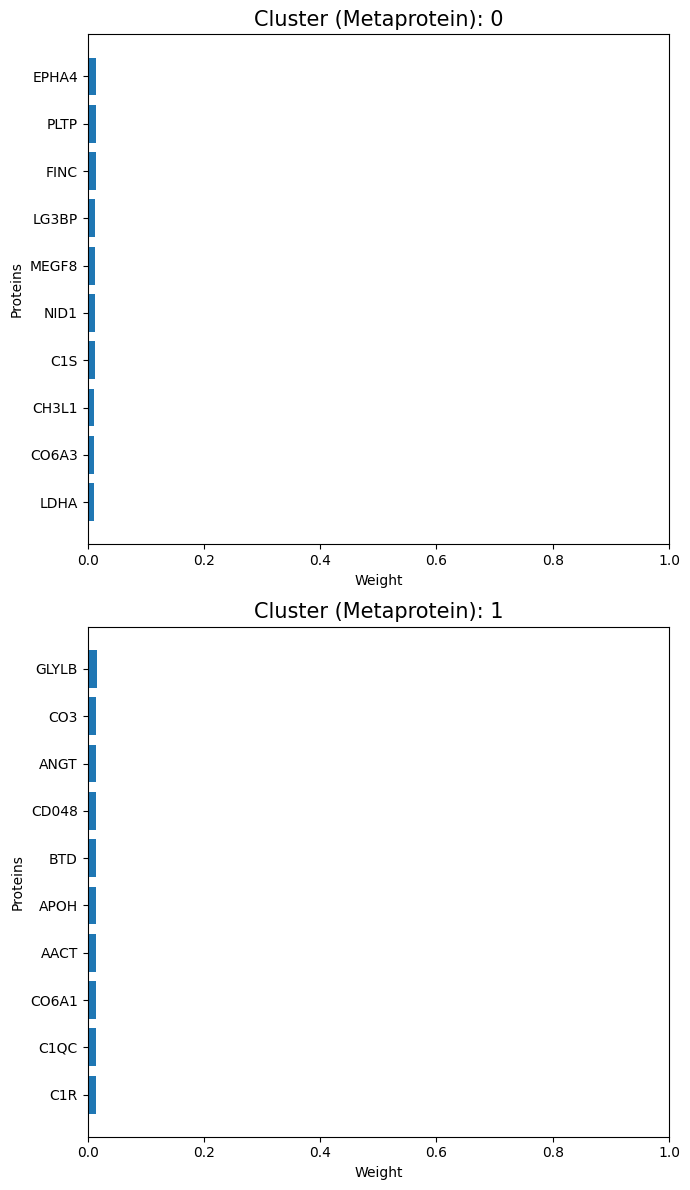

In [24]:
# topk proteins from each cluster (metaprotein)
k_proteins = topk_proteins_each_cluster(W)
# plotting the topk proteins from each cluster
plotting_topk_proteins_each_cluster(k_proteins)

Visualizing the patients in each cluster

In [48]:
def plotting_clusters(H, patient_clusters):

    fig, ax = plt.subplots(figsize=(8, 8))

    classes = ['Cluster_' + str(i) for i in range(len(H))]
    scatter = ax.scatter(H[0], H[1], c=patient_clusters, s=100)
    ax.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=13, markerscale=1.5)
    for idx, label in enumerate(patient_code):
        ax.annotate(label, (H[0][idx], H[1][idx]), fontsize=8)

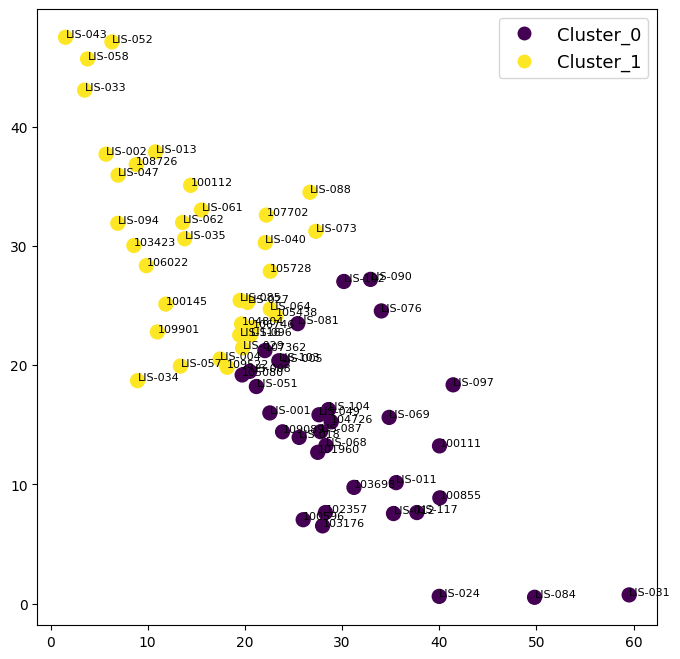

In [54]:
plotting_clusters(H, patient_clusters)

#group_cluster_dict= {'MCI-Other': [], 'MCI-AD' :[]}
#for i in range(len(patient_group)):
    #group_cluster_dict[patient_group[i]].append(patient_clusters[i])
#print(group_cluster_dict)


In [29]:

silhouette = silhouette_score(df.T, patient_clusters)
print(silhouette)

0.046039025754476014


In [17]:
save_df = df.T.copy()
save_df.insert(0, 'Code', patient_code)
save_df.insert(1, 'Cluster', patient_clusters)
save_df.to_csv('../data/'+dir+'/no_fbln3_nmf_min_max_results_{}_v2.csv'.format(n_clust), index=False)

**Random Forest**

Paper reported results:
- error <9.5%
- Accuracy>85%

Metanalyst:
- error: 
- Accuracy: 

### **Clustering Proteins: The most expressed proteins for each cluster**

 **Normalize the proteins expression levels of the computing the Z-score, according to the control group**

The Z-score is computed with the formula $Z = \frac{x - \mu}{\delta}$,  Where:   
- $x$ is the expression level of that protein in that specific A-beta positve patient
- $\mu$ is the mean of that protein in all the A-beta negative patients (control patients)
- $\delta$ is the standard deviation of that protein over all the expression levels in all the A-beta negative patients (control patients)

In [22]:
ab_neg_df = all_patients.loc[all_patients['Group'] == 'MCI-Other'].copy()
ad_neg_patient_code = ab_neg_df['Code']
ab_neg_df.drop(columns=['Code', 'Group'], inplace = True)
ab_neg_df = ab_neg_df.T


print(f'The A-beta negative dataframe has dimension: \n {ab_neg_df.shape[0]} rows (proteins) x {ab_neg_df.shape[1]} columns (patients)')

The A-beta negative dataframe has dimension: 
 168 rows (proteins) x 37 columns (patients)


In [23]:
# Computing z-score for each of the expression values in the A-beta positive df, using the A-beta negative mean and sd for each protein
mean = ab_neg_df.mean(axis=1)
std = ab_neg_df.std(axis=1)
z_score = df.sub(mean, axis=0).div(std, axis=0)# (x - mean)/std
z_score

,37,38,39,40,41,42,43,44,45,46,...,50,51,52,53,54,55,56,57,58,59
IBP7,-1.938833,-0.350350,-2.170728,-3.229330,-2.182323,-2.414218,-2.309865,-1.173578,-1.521421,-2.367839,...,-2.495382,-2.077970,-2.101159,-2.402623,-2.631040,-2.799164,-2.506976,-2.553355,-2.367839,0.901885
APOH,-1.881789,-0.844283,-1.307685,-1.699003,-1.941002,-2.091608,-2.181714,-1.269068,-1.372047,-1.751779,...,-1.559982,-1.359174,-1.462153,-1.500770,-1.372047,-1.565131,-1.543248,-1.795545,-2.033682,-0.844283
RNAS1,-2.756025,-1.579851,-1.789636,-2.436188,-0.630658,-1.645194,-1.542021,-0.716635,0.239436,-1.724293,...,-2.401797,-1.848101,-2.824807,-2.811051,-2.807612,-2.996763,-2.504970,-1.284088,-1.758684,-0.761344
HEMO,-1.729612,-1.516723,-1.158683,-1.552204,-1.955403,-1.694130,-1.884440,-1.684453,-0.807094,-1.836056,...,-1.158683,-1.068366,-1.307060,-1.284481,-1.097397,-1.139329,-2.339247,-1.968305,-2.377955,-0.774838
CD048,-0.349965,-1.274617,-2.953216,-1.150144,-1.381307,-1.203490,-1.434653,-0.510000,-0.794509,-1.959215,...,-2.953216,-2.581577,-1.043454,-1.864972,-2.967441,-1.964549,-2.858973,-0.012111,-1.416871,0.201270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NRP2,-0.842640,2.486301,-0.967965,-0.826975,-0.247347,-0.028029,-0.960132,-0.411836,-0.497997,-0.216016,...,0.214788,0.230454,-0.983631,-0.928801,-1.074491,-0.834808,-0.286511,-0.858306,-0.881804,-1.030628
CATH,0.297330,1.203957,-0.681489,1.352585,-0.375741,0.059526,3.072418,0.220893,-0.046637,0.301576,...,-0.923539,2.753930,-0.666626,2.329280,2.180653,-0.672996,-0.462794,-0.118827,0.165688,3.518300
CD14,-0.791694,-0.241403,0.079866,-0.737619,0.302527,-1.182942,-0.215956,0.302527,2.147435,-1.014356,...,1.415834,-0.476787,-1.469221,-1.459678,-1.790489,-0.756705,-1.628265,-0.632650,0.175292,-1.109782
HV118,1.542033,-0.305384,2.776022,0.165387,0.593360,-0.455174,-0.198391,0.308044,-0.241188,-0.205523,...,0.493499,0.678954,1.599096,0.643290,0.793080,1.613362,0.201051,0.258114,-0.455174,0.094058


In [24]:
# Clustering the proteins according to both the highest average values and the NMF prediction method
# -------- Labelling the proteins with the NMF model ------------
protein_cluster_nmf = np.array(nsnmf_fit.fit.predict(what='features'))
protein_cluster_nmf = protein_cluster_nmf[0] #clusters of each protein

# -------- Labelling the proteins according to which cluster showed the highest average level ---------
mean_protein_cluster = []
std_protein_cluster = []
for clust in range(n_clust):
    patients_cluster_idx = np.where(patient_clusters == clust)[0] #patients within clust
    means = z_score[z_score.columns[patients_cluster_idx]].mean(axis = 1) #mean protein expression in each cluster
    std = z_score[z_score.columns[patients_cluster_idx]].std(axis = 1) #mean protein expression in each cluster
    mean_protein_cluster.append(means)
    std_protein_cluster.append(std)
protein_cluster_zscore = np.argmax(mean_protein_cluster, axis = 0) #cluster where the protein has max mean expression

# Generating the final dataframe
clustered_proteins_df = pd.DataFrame(index = protein_code)
for clust in range(len(mean_protein_cluster)):
    clustered_proteins_df['Mean_Cluster_'+str(clust)] = mean_protein_cluster[clust]
    clustered_proteins_df['Std_Cluster_'+str(clust)] = std_protein_cluster[clust]
clustered_proteins_df['Cluster with higher protein levels'] = protein_cluster_zscore
clustered_proteins_df['NMF protein cluster'] = protein_cluster_nmf
clustered_proteins_df.to_csv('../data/'+dir+'/protein_cluster.csv')
clustered_proteins_df

,Mean_Cluster_0,Std_Cluster_0,Mean_Cluster_1,Std_Cluster_1,Cluster with higher protein levels,NMF protein cluster
IBP7,-1.646065,1.007952,-2.420859,0.540393,0,0
APOH,-1.558159,0.479799,-1.530610,0.130347,1,1
RNAS1,-1.319912,0.766674,-2.293622,0.617710,0,0
HEMO,-1.558924,0.475730,-1.358962,0.474294,1,1
CD048,-1.337742,0.955608,-1.711402,1.058785,0,0
...,...,...,...,...,...,...
NRP2,-0.258444,0.979880,-0.643687,0.471847,0,0
CATH,0.620241,1.334986,0.462750,1.396763,0,1
CD14,-0.095878,0.918064,-0.886831,0.913697,0,0
HV118,0.311016,0.958442,0.588172,0.629540,1,1


Text(33.222222222222214, 0.5, 'Proteins')

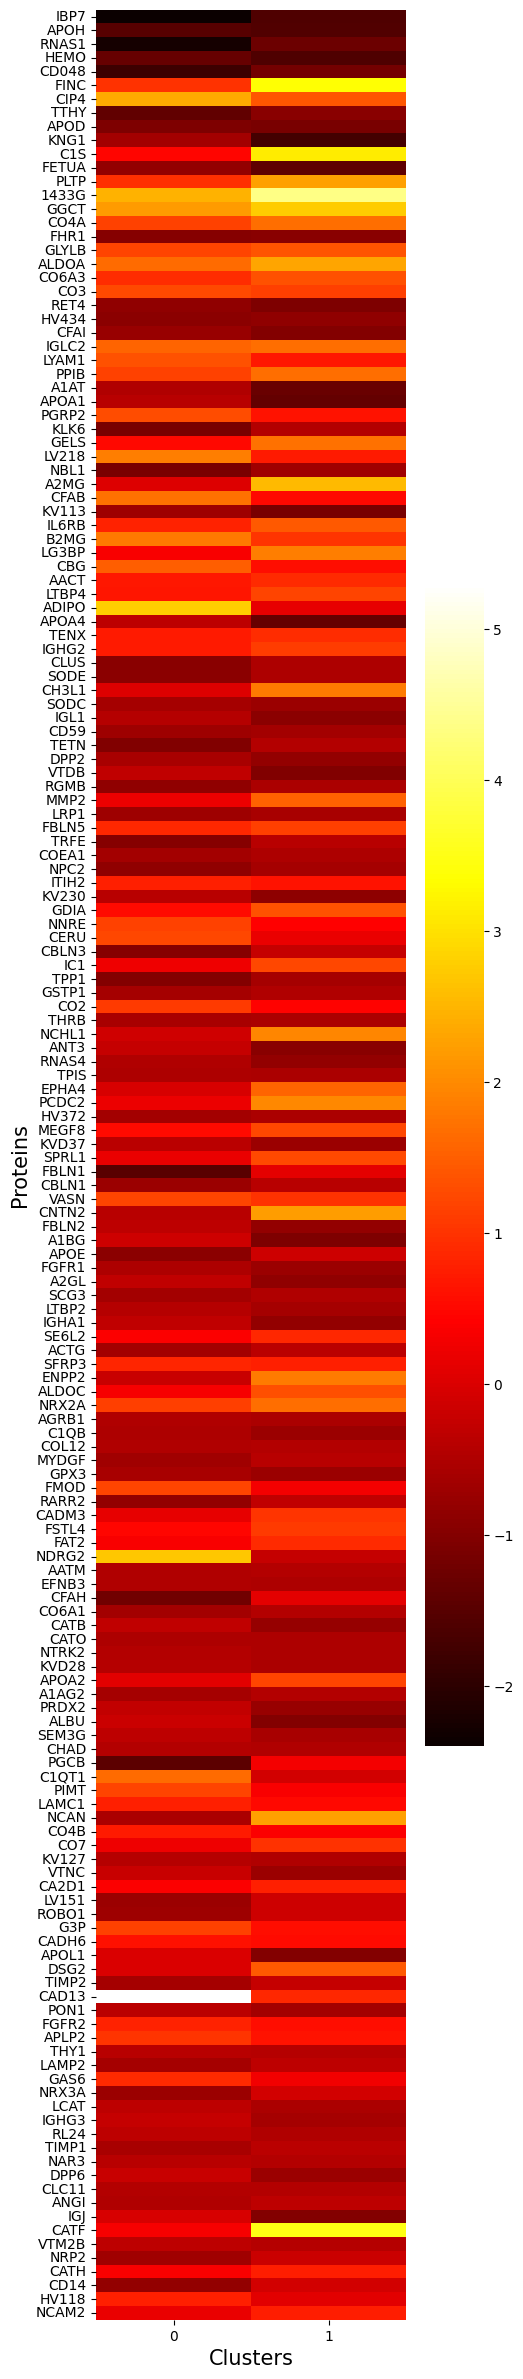

In [53]:

# Generating the heatmap
fig = plt.figure(figsize=(5, 30))

ax = sns.heatmap(clustered_proteins_df[['Mean_Cluster_0', 'Mean_Cluster_1']], cmap='hot', xticklabels=[0,1],  yticklabels=protein_code) #vmax = 0.05 vmax = 2, vmin = -2
#plt.yticks(fontsize=8)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Proteins', fontsize = 15)
#ax.figure.axes[-1].yaxis.label.set_size(15)


Cluster with higher protein levels
0    82
1    82
dtype: int64


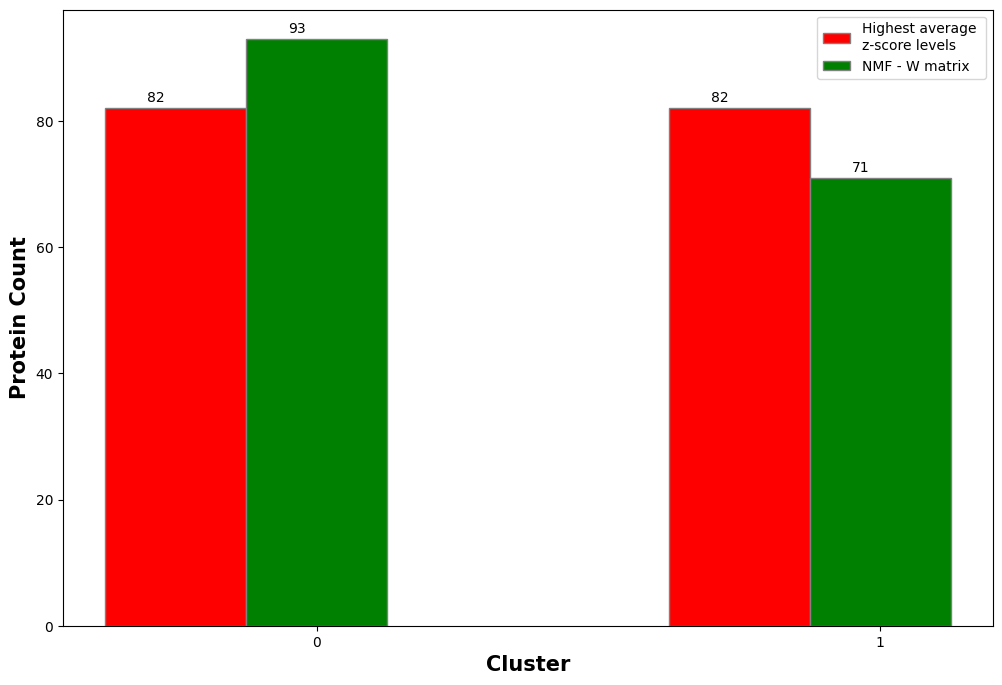

In [73]:
# Counting the number of proteins clusterized with NMF and with highest average levels
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
zscore_clusters = clustered_proteins_df.groupby('Cluster with higher protein levels').size()
nmf_clusters = clustered_proteins_df.groupby('NMF protein cluster').size()
print(zscore_clusters)
# Set position of bar on X axis 
br1 = zscore_clusters.index
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, zscore_clusters, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Highest average \nz-score levels') 
plt.bar(br2, nmf_clusters, color ='g', width = barWidth, 
        edgecolor ='grey', label ='NMF - W matrix') 
for idx in zscore_clusters.index:
    plt.annotate(str(zscore_clusters[idx]), (idx - 0.05, zscore_clusters[idx] + 1))
    plt.annotate(str(nmf_clusters[idx]), (idx - 0.05 + barWidth, nmf_clusters[idx] + 1))

# Adding Xticks 
plt.xlabel('Cluster', fontweight ='bold', fontsize = 15) 
plt.ylabel('Protein Count', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(zscore_clusters))], 
        zscore_clusters.index)

plt.legend()
plt.show() 

10
10


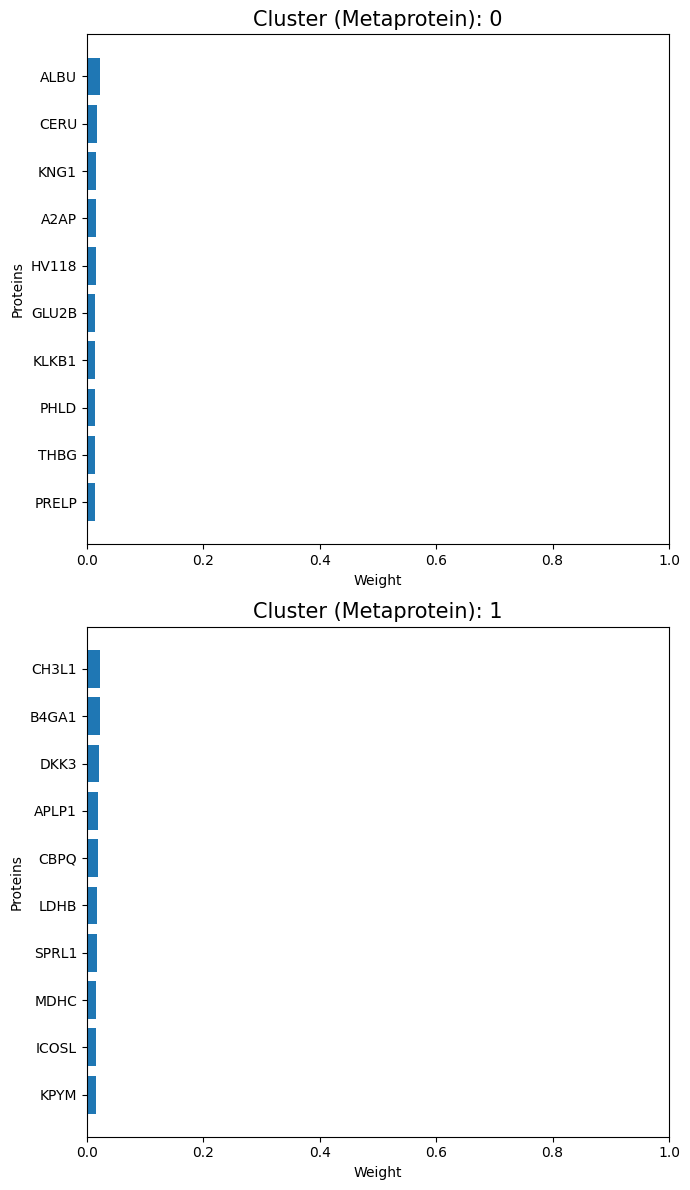

In [74]:
# topk proteins from each cluster (metaprotein)
k_proteins_zscore = topk_proteins_each_cluster(clustered_proteins_df[['Mean_Cluster_0', 'Mean_Cluster_1']])
# plotting the topk proteins from each cluster
plotting_topk_proteins_each_cluster(k_proteins)